In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
from fastf1 import plotting

In [12]:
plotting.setup_mpl(misc_mpl_mods=False, color_scheme="fastf1")
ff1.Cache.enable_cache('/Users/will/Library/Caches/fastf1')
year = 2024
wknd = 12
session = ff1.get_session(year, wknd, "R")
session.load()


core           INFO 	Loading data for British Grand Prix - Race [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']


In [13]:
laps = session.laps.copy()

laps["LapTimeSeconds"] = laps["LapTime"].dt.total_seconds()

laps["FastestStintLap"] = laps.groupby(["Driver", "Stint"])[
    "LapTimeSeconds"
].transform("min")

laps["DegDelta"] = laps["LapTimeSeconds"] - laps["FastestStintLap"]


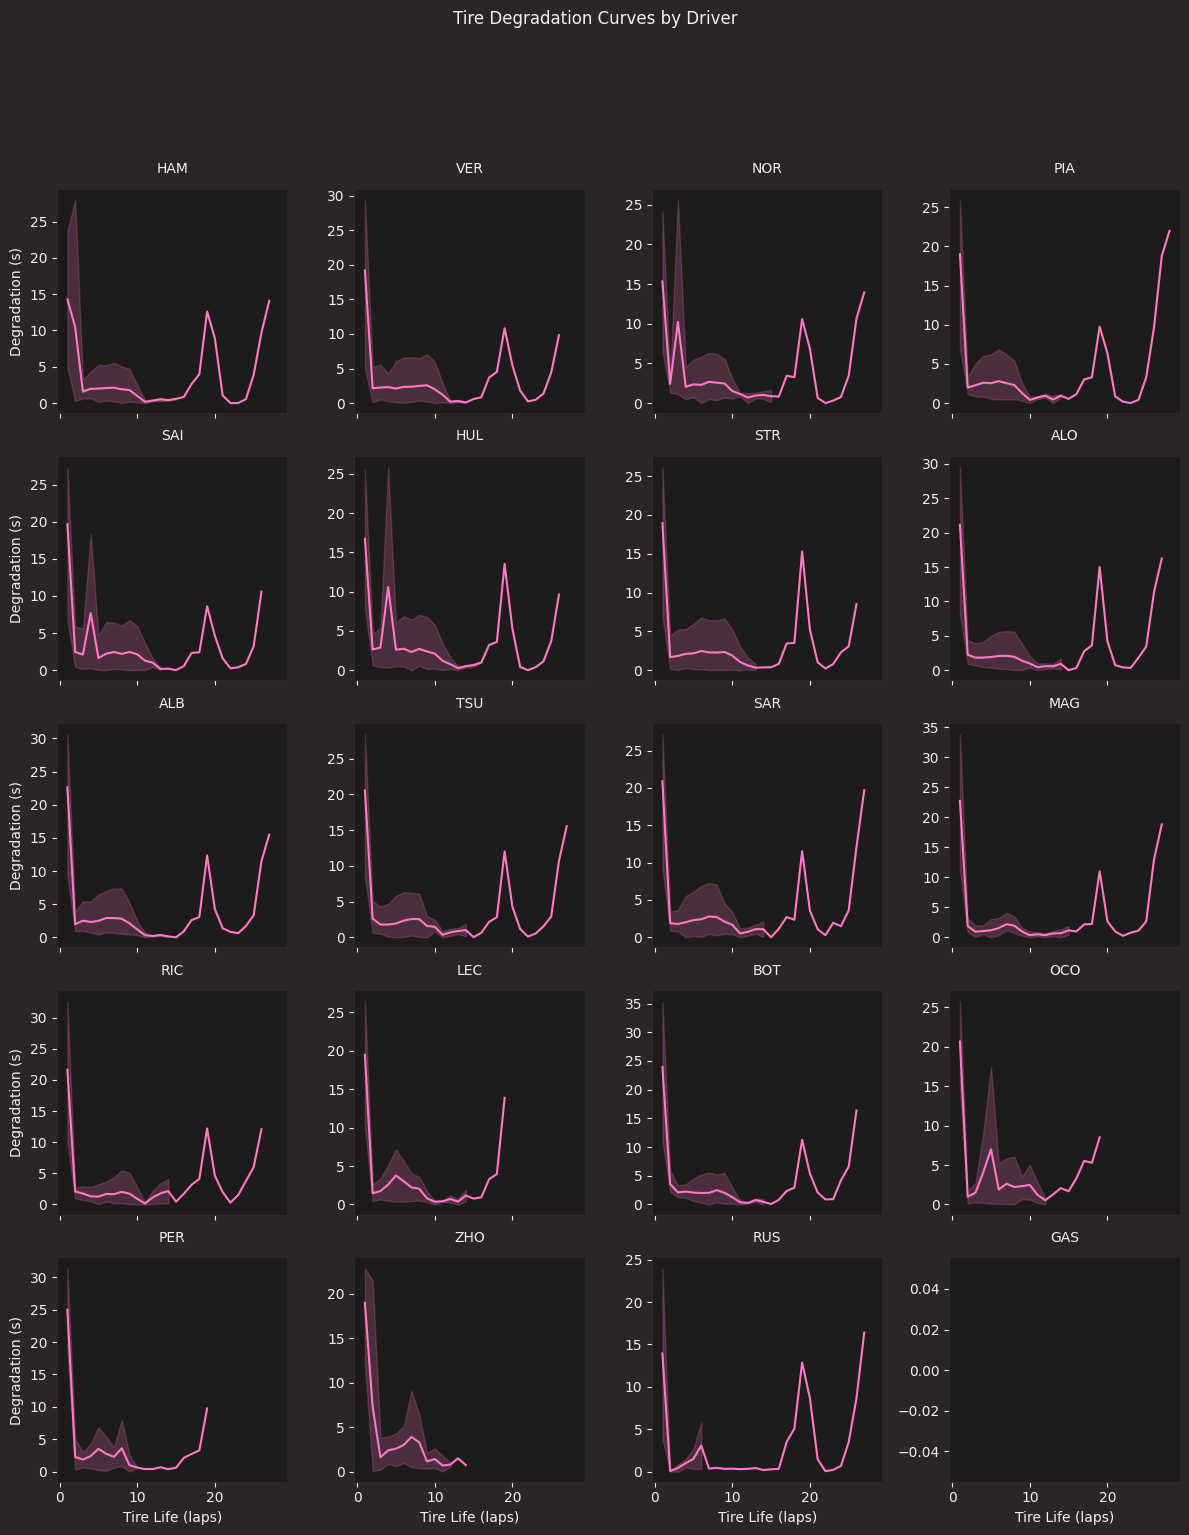

In [14]:
g = sns.FacetGrid(laps, col="Driver", col_wrap=4, sharey=False, height=3)

g.map_dataframe(sns.lineplot, x="TyreLife", y="DegDelta")

g.set_axis_labels("Tire Life (laps)", "Degradation (s)")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Tire Degradation Curves by Driver", y=1.02)

plt.show()